In [12]:
from functools import partial
import numpy as np
from scipy.optimize import root_scalar, minimize, newton, root_scalar, brentq
import nidaqmx as ni
from K10CR1 import K10CR1_stage

def read_daq_output(DAQ_name='Dev2'):

    with ni.Task() as read_task:
        
    
        read_task.ai_channels.add_ai_voltage_chan(DAQ_name + "/ai0",
                                    min_val=-10, max_val=10)
        result = np.array(read_task.read())
    return result

def read_detector(rotator, angle):

    residual_anle = angle % 360
    rotator.move(float(angle))
    value = read_daq_output()
    return value

In [2]:
polarizer = K10CR1_stage(serial_no=55422054)
polarizer.initialize_instrument()
polarizer.home_device()



HWP = K10CR1_stage(serial_no=55425654)
HWP.initialize_instrument()
HWP.home_device()
HWP.move(180)

HWP_angles = []

initial_guess = 180

guess = initial_guess

Important: make sure you are not running Kinesis softeare in the meantime. 
Otherwise the initialization will fail.
K10CR1 Rotational Stage
Homing the rotation stage of SN:  55422054
The system is at home position. This position will be referred as 0 degree.
Important: make sure you are not running Kinesis softeare in the meantime. 
Otherwise the initialization will fail.
K10CR1 Rotational Stage
Homing the rotation stage of SN:  55425654
The system is at home position. This position will be referred as 0 degree.
Moving the rotation stage of SN: 55425654 to 180 degrees
Movement finished.


In [3]:

# for angle in np.linspace(0,360, num=361):
#     polarizer.move(angle)
#     zero_angle = newton(partial(read_detector, HWP), 
#                       guess, maxiter=50)
#     HWP_angles.append(zero_angle)
#     guess = zero_angle

In [46]:
read_daq_output()

array(0.2052462)

In [6]:
HWP.move(180)

Moving the rotation stage of SN: 55425654 to 180 degrees
Movement finished.


In [10]:
read_daq_output()

array(-0.06401888)

In [9]:
polarizer.move(250)
# HWP.move(170)

Moving the rotation stage of SN: 55422054 to 250 degrees
Movement finished.


In [13]:
# zero_angle = newton(partial(read_detector, HWP), 
#                       180, maxiter=50, tol=0.0001)
zero_angle = brentq(partial(read_detector, HWP), 
                      0, 90)

Moving the rotation stage of SN: 55425654 to 0 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 90 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 22.06539 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.8475202 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.4746051 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.3295882 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.309277 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.3272583 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.32892 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.3294604 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.329579 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0.3295875 degrees
Movement finished.
Moving the rotation stage of SN: 554

In [ ]:
for angle in np.linspace(0,360, num=90):
    polarizer.move(angle)
    # results2.append(read_daq_output())

In [29]:
polarizer.move(0)
results2 = []
for angle in np.linspace(0,360, num=90):
    HWP.move(angle)
    results2.append(read_daq_output())

Moving the rotation stage of SN: 55422054 to 0 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 0 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 4.044944 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 8.089888 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 12.13483 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 16.17978 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 20.22472 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 24.26966 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 28.31461 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 32.35955 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 36.4045 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 to 40.44944 degrees
Movement finished.
Moving the rotation stage of SN: 55425654 t

In [20]:
import matplotlib.pyplot as plt

In [30]:
results2 = np.array(results2).reshape(-1)

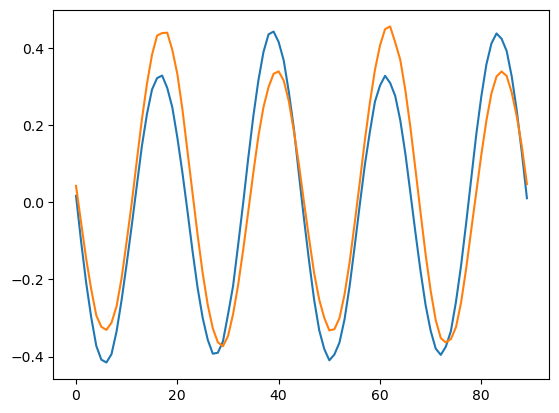

In [39]:
plt.plot((results))
plt.plot((results2))

In [ ]:
res1= results

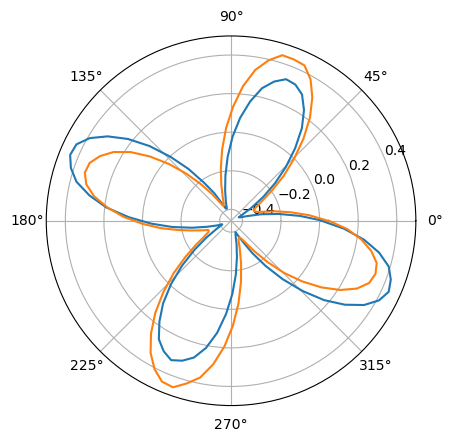

In [38]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
ax.plot(np.linspace(0,2*np.pi, num=90), (results))
ax.plot(np.linspace(0,2*np.pi, num=90), (results2))